In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
X = data.drop("target", axis = 1)
y = data["target"]

In [11]:
 y.value_counts()   # balanced

target
1    165
0    138
Name: count, dtype: int64

In [15]:
data.duplicated().sum()

1

In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()

0

## When data is low in quantity we do Cross Validation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 43, test_size = 0.20)

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred_train = log.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(y_train, y_pred_train)

0.8347107438016529

In [27]:
confusion_matrix(y_train, y_pred_train)

array([[ 81,  29],
       [ 11, 121]], dtype=int64)

In [28]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       110
           1       0.81      0.92      0.86       132

    accuracy                           0.83       242
   macro avg       0.84      0.83      0.83       242
weighted avg       0.84      0.83      0.83       242



In [29]:
y_pred_test = log.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_test)

0.8852459016393442

In [31]:
confusion_matrix(y_test, y_pred_test)

array([[21,  7],
       [ 0, 33]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       0.82      1.00      0.90        33

    accuracy                           0.89        61
   macro avg       0.91      0.88      0.88        61
weighted avg       0.91      0.89      0.88        61



In [33]:
# It is not overfitting
# but model predicts 0 better than 1
# models captures actual 1's better than 0

Great question. Let's interpret **recall** and **precision** on your **test data** classification report:

---

## 📋 **Test Classification Report Recap**

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| **0** (Negative) | 1.00      | 0.75   | 0.86     | 28      |
| **1** (Positive) | 0.82      | 1.00   | 0.90     | 33      |

---

## 🔍 Interpretation by Class

---

### 🔹 **Class 0 (Negative class)**

* **Precision = 1.00**
  → Every prediction labeled as class 0 was **correct** (no false positives).
  ✔️ **Zero wrongly predicted class 0 samples.**

* **Recall = 0.75**
  → Only **75% of actual class 0s** were correctly identified.
  ⚠️ **25% of real class 0s were missed** (false negatives).

> **In short:** Model is very careful when predicting class 0 — it only predicts when sure, but misses some.

---

### 🔹 **Class 1 (Positive class)**

* **Precision = 0.82**
  → 82% of the predicted class 1 labels were correct.
  ⚠️ 18% were false positives (wrongly labeled as 1).

* **Recall = 1.00**
  → **All actual class 1 samples** were correctly identified.
  ✔️ No false negatives for class 1.

> **In short:** Model catches **every actual class 1 case**, but sometimes it mistakenly predicts class 1 when it's not.

---

## 🎯 When Is This Good?

* If **class 1 is the important or minority class** (e.g., fraud, cancer):

  * **Recall = 1.00** is excellent — no real positive case is missed.
  * Slightly lower precision (0.82) means some false alarms, but that’s often acceptable.

---

## 📌 Summary:

| Metric    | Meaning                                       | What it shows here                                                                             |
| --------- | --------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| Precision | Out of predicted positives, how many correct? | Model makes **very accurate class 0 predictions**, and **mostly correct class 1 predictions**. |
| Recall    | Out of actual positives, how many caught?     | **Catches all class 1s**, but misses some class 0s.                                            |

---

Would you like a **visual confusion matrix** to help with this interpretation?


### ✅ What is **Cross-Validation**?

**Cross-validation** is a statistical method used to **evaluate the performance of a machine learning model** on **unseen data**.
It helps ensure that the model **generalizes well** and doesn't just perform well on the training data (i.e., reduces overfitting).

---

### 💡 Why Use Cross-Validation?

* Better estimate of model performance
* Detect overfitting or underfitting
* More reliable than just a single train-test split

---

### 🔄 How It Works (Example: k-Fold Cross-Validation):

1. Split your data into **k** equal-sized parts (folds)
2. For each of the k iterations:

   * Use **k-1 folds for training**
   * Use **1 fold for validation**
3. Average the performance across the k trials

---

### 🔥 Common Types of Cross-Validation:

| Type                        | Description                                                                     |
| --------------------------- | ------------------------------------------------------------------------------- |
| **k-Fold Cross-Validation** | Data is split into *k* folds. Each fold is used once as test, rest as train.    |
| **Stratified k-Fold**       | Like k-Fold but ensures each fold has the **same class distribution**.          |
| **Leave-One-Out (LOOCV)**   | Each sample is a test set once; remaining are training. Very accurate but slow. |
| **Holdout Method**          | Simple train-test split. Not technically "cross-validation" but commonly used.  |
| **Repeated k-Fold**         | Repeats k-Fold CV multiple times with different splits to increase reliability. |
| **TimeSeriesSplit**         | Used when data is time-dependent (e.g., stock prices). Splits maintain order.   |

---

### 📊 Visualization Example (5-Fold CV):

```
Fold 1:  [TEST]  [TRAIN] [TRAIN] [TRAIN] [TRAIN]
Fold 2:  [TRAIN] [TEST]  [TRAIN] [TRAIN] [TRAIN]
Fold 3:  [TRAIN] [TRAIN] [TEST]  [TRAIN] [TRAIN]
...
```

---

### 📌 Example Code (Scikit-learn):

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)

print("Accuracy scores:", scores)
print("Average accuracy:", scores.mean())
```

---

### 🧠 Summary:

* **Cross-validation** gives a more reliable estimate of model performance.
* **k-Fold** and **Stratified k-Fold** are most common.
* Use **TimeSeriesSplit** for time-series data.
* Always combine with **hyperparameter tuning** for best results!

Would you like an example with your dataset or code?


### What are **Hyperparameters**?

In machine learning, **hyperparameters** are the settings or configurations that you set **before** the learning process begins. They control **how** the model learns from the data but are **not learned from the data** itself.

#### 🔧 Examples of Hyperparameters:

| Model Type        | Hyperparameter Examples                          |
| ----------------- | ------------------------------------------------ |
| Linear Regression | Regularization strength (e.g., L1 or L2 penalty) |
| Decision Tree     | Max depth, min samples split                     |
| Random Forest     | Number of trees, max features                    |
| Neural Networks   | Learning rate, batch size, number of layers      |
| KNN               | Number of neighbors (k)                          |
| SVM               | Kernel type, C value, gamma                      |

---

### What is **Hyperparameter Tuning**?

**Hyperparameter tuning** is the process of **searching for the best combination** of hyperparameter values that result in the best model performance.

Since these values can't be learned automatically, we have to test different configurations and evaluate the model on validation data.

---

### 🔍 Common Methods for Hyperparameter Tuning:

| Method                    | Description                                                             |
| ------------------------- | ----------------------------------------------------------------------- |
| **Grid Search**           | Tries **all combinations** from a list of hyperparameters (exhaustive). |
| **Random Search**         | Randomly selects combinations. Faster than grid search.                 |
| **Bayesian Optimization** | Uses probability to find the best values based on previous results.     |
| **Manual Tuning**         | You try values by hand based on experience or intuition.                |

---

### 🔁 Example (with GridSearchCV in Scikit-learn):

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10]
}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
```

---

### 🎯 Summary

* **Hyperparameters**: You set them before training (like learning rate, tree depth).
* **Tuning**: Systematic process of finding the best values.
* **Goal**: Achieve the best model performance on validation/test data.

Let me know your model type and I can help tune its hyperparameters!


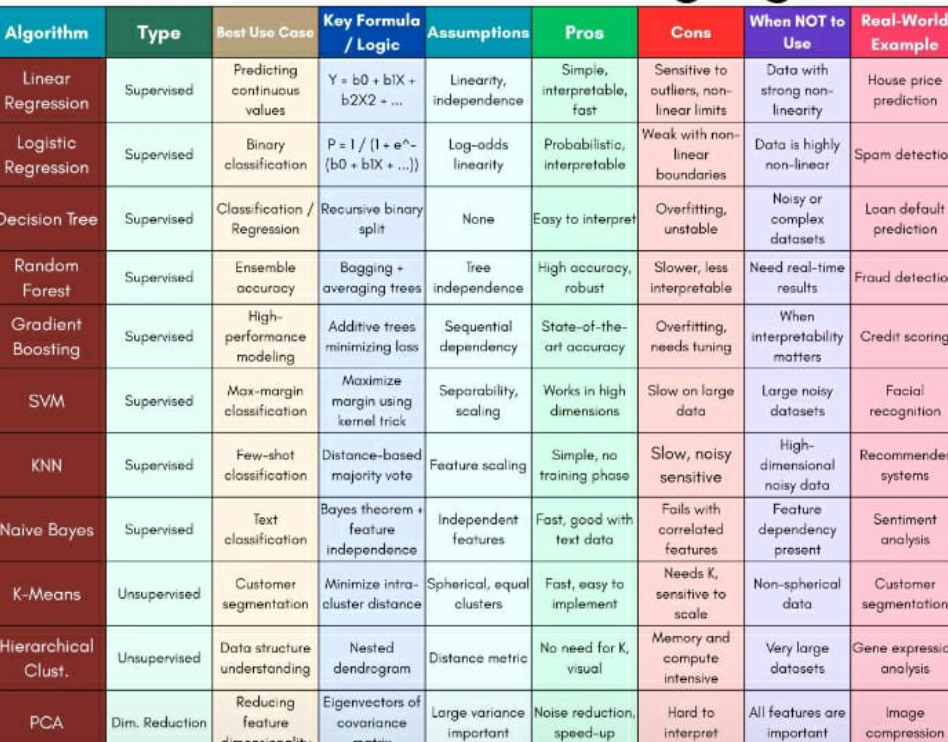


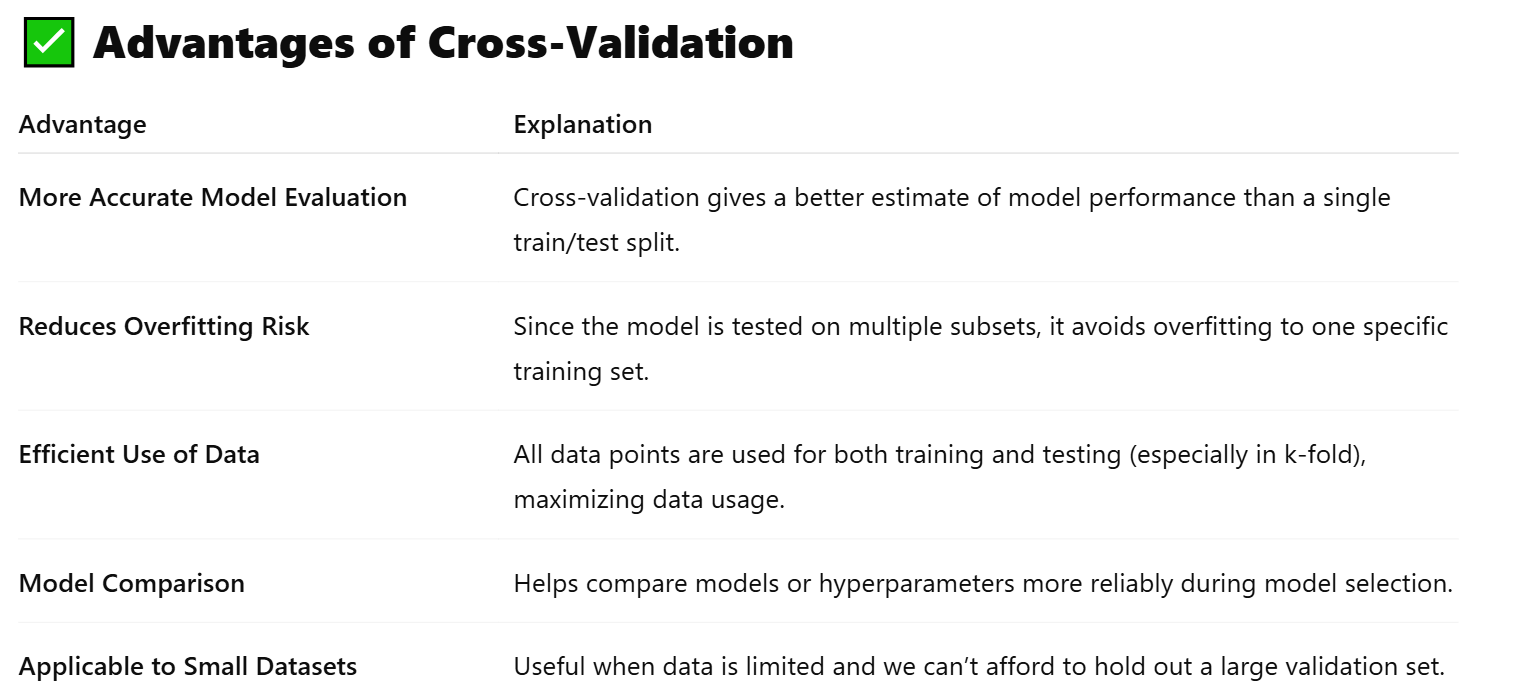

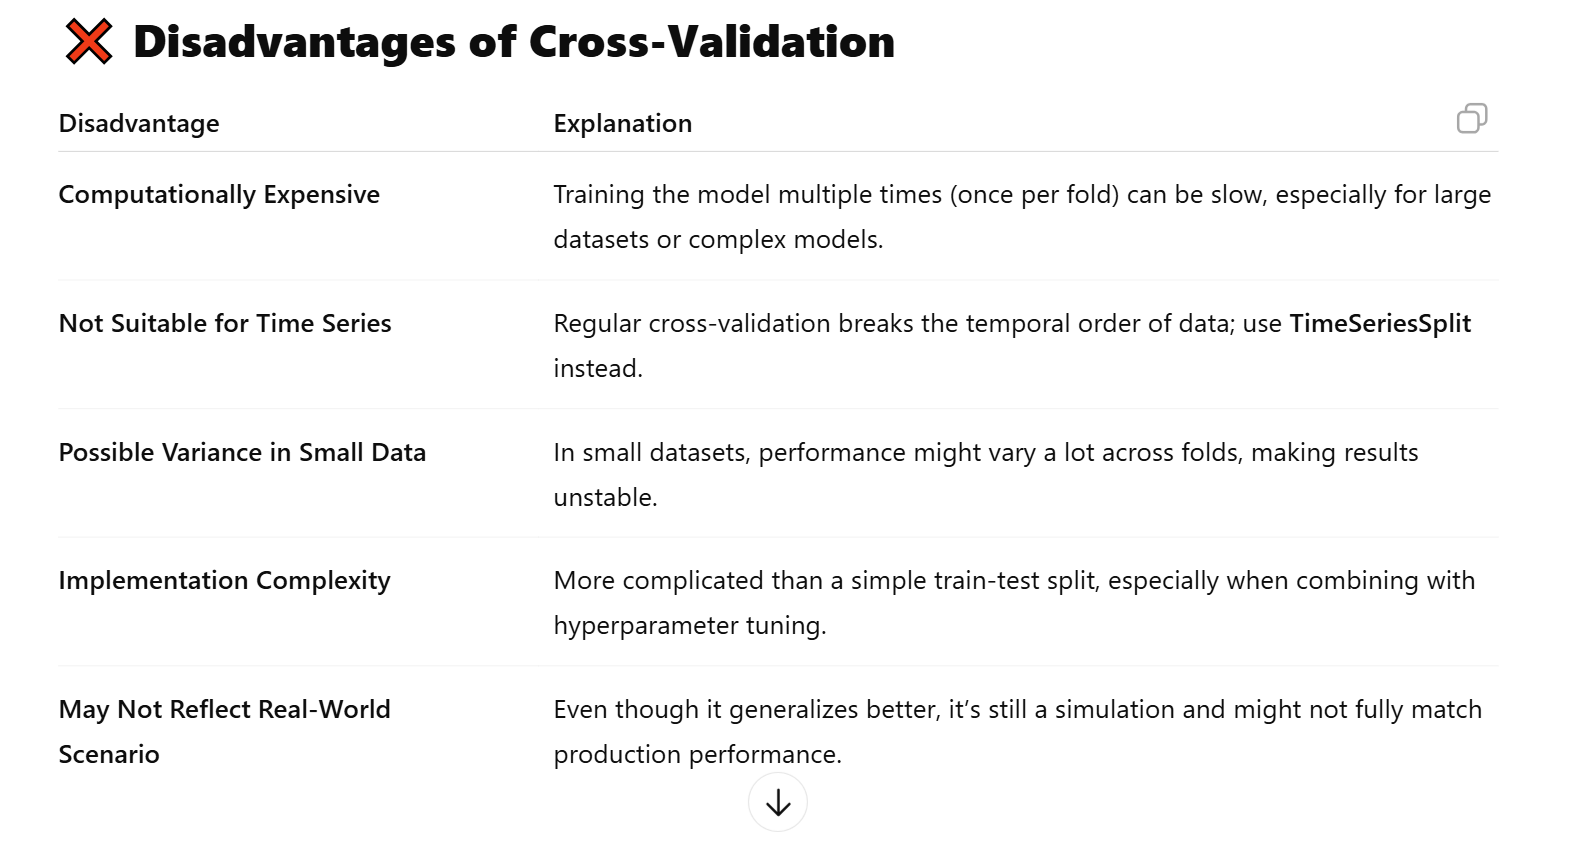

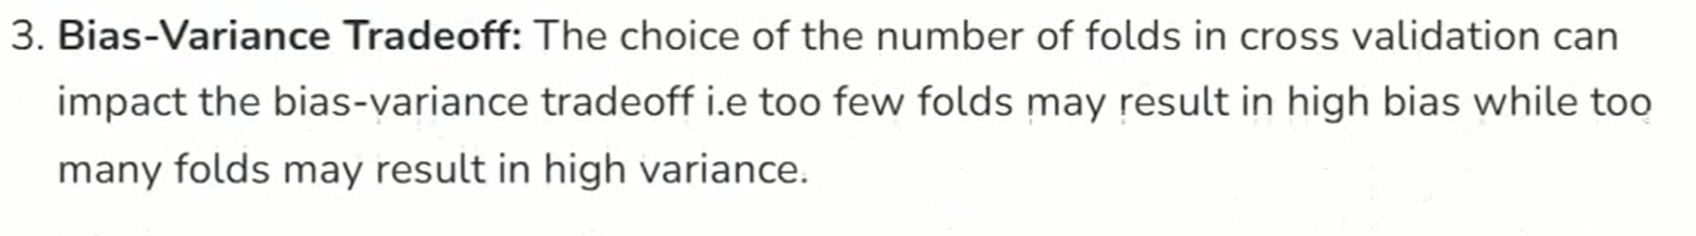

In [41]:
from sklearn.model_selection import cross_val_score, KFold

In [42]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Perform cross-validation
cross_val_results = cross_val_score(log, X, y, cv=kf)

# Print the scores
print("Cross-validation scores:", cross_val_results)
print("Average score:", np.mean(cross_val_results))


Cross-validation scores: [0.8852459  0.83606557 0.83606557 0.75       0.86666667]
Average score: 0.834808743169399


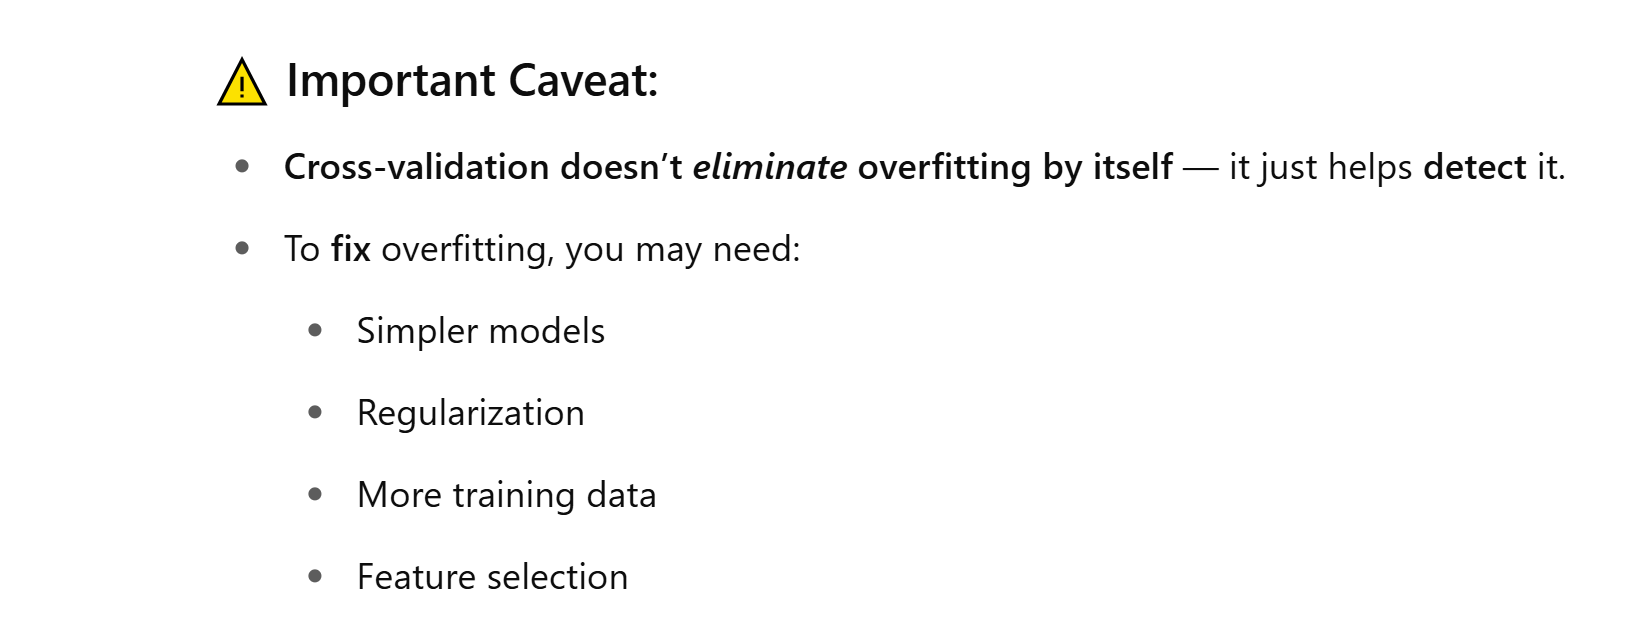

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clf = DecisionTreeClassifier(random_state=0)  # default "gini"

In [80]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
y_pred_train = clf.predict(X_train)

In [84]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [86]:
y_pred_test = clf.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [91]:
# some sort of overfitting not really but if it happens then we do pruning.

In [99]:
clf = DecisionTreeClassifier(max_depth=1,random_state=0)  # default "gini"
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

print("\n")

y_pred_test = clf.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       110
           1       0.80      0.75      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.77      0.76       242
weighted avg       0.77      0.76      0.76       242



              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



In [101]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)  # default "gini"
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

print("\n")

y_pred_test = clf.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.54      0.68       110
           1       0.72      0.97      0.82       132

    accuracy                           0.77       242
   macro avg       0.83      0.75      0.75       242
weighted avg       0.82      0.77      0.76       242



              precision    recall  f1-score   support

           0       0.93      0.50      0.65        28
           1       0.70      0.97      0.81        33

    accuracy                           0.75        61
   macro avg       0.81      0.73      0.73        61
weighted avg       0.80      0.75      0.74        61



In [105]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)  # default "gini"
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(classification_report(y_train,y_pred_train))

print("\n")

y_pred_test = clf.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.88      0.92      0.90       132

    accuracy                           0.89       242
   macro avg       0.89      0.88      0.89       242
weighted avg       0.89      0.89      0.89       242



              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

